In [1]:
from bs4 import BeautifulSoup
import string
from nltk.stem import PorterStemmer
import numpy as np

In [2]:
import re

def cleanhtml(raw_html): #Cleans the HTML File 
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext


In [3]:
def read_stopwords():  #list all stop words .
  stopword=[]
  f=open("/Users/zohamobin/Desktop/IR_Assign2/Stopword-List (2).txt","r")
  stopwordlist=f.readlines()
  f.close()
  for l in stopwordlist:
     stopword=stopword+l.split()
  return(stopword)

In [4]:
def speech_tokenize(speech_text):

    
    clean_words = re.sub(r'[^\w\s]',' ',speech_text) #removed punctuation and brackets
    words = clean_words.split() 
    words = [word.lower() for word in words] #lower cased
    #words = list(set(words)) #Duplicates Removed
    
    words = [i for i in words if not any(c.isdigit() for c in i)]
    
    stopword=read_stopwords()
    words = [word for word in words if word not in stopword] #Remove Stop words
    
    ps_word = PorterStemmer() #Stemming
    stemmed_word = [ps_word.stem(word) for word in words]
      
 
    return stemmed_word

In [5]:
def noun_tokenize(speech_text): #Words not being stemmed

    
    clean_words = re.sub(r'[^\w\s]',' ',speech_text) #removed punctuation and brackets
    words = clean_words.split() 
    words = [word.lower() for word in words] #lower cased
    #words = list(set(words)) #Duplicates Removed
    
    words = [i for i in words if not any(c.isdigit() for c in i)]
    
    stopword=read_stopwords()
    words = [word for word in words if word not in stopword] #Remove Stop words
    
 
    return words

In [6]:
def stem_tokenize(words):

    
    ps_word = PorterStemmer() #Stemming
    stemmed_word = [ps_word.stem(word) for word in words]
      
 
    return stemmed_word

In [10]:
import os
import codecs
course_docs = []
content = ''
doc_id_list= []
count = 0
doc_token={}
i=0
DF = {}
directory = r'/Users/zohamobin/Desktop/course-cotrain-data/all'
for filename in os.listdir(directory):
    
    if filename.endswith('.html'): #Retrieving only HTML Files
          
        fname = os.path.join(directory, filename)
        print("Current file name ..", os.path.abspath(fname))
        doc_id_list.append(count)
        count = count+1
        file = codecs.open(os.path.abspath(fname), "r", encoding="ISO-8859-1")
        doc = cleanhtml(file.read())
        course_docs.append(doc)
        content = content+doc
        total_words=speech_tokenize(content)
        i=i+1
        doc_token[i]=total_words
        
    for j in range(len(total_words)): #Calculating Document Frequency
            tokens = total_words[j]
            try:
                DF[tokens].add(i)
            except:
                DF[tokens] = {i}
                

Current file name .. /Users/zohamobin/Desktop/course-cotrain-data/all/http:^^www.cs.wisc.edu^~cs520-1^cs520.html
Current file name .. /Users/zohamobin/Desktop/course-cotrain-data/all/http:^^www.cs.cornell.edu^Info^People^frank^frank.html
Current file name .. /Users/zohamobin/Desktop/course-cotrain-data/all/http:^^www.cs.washington.edu^research^projects^grail2^www^index.html
Current file name .. /Users/zohamobin/Desktop/course-cotrain-data/all/http:^^www.cs.wisc.edu^~twang^twang.html
Current file name .. /Users/zohamobin/Desktop/course-cotrain-data/all/http:^^www.cs.utexas.edu^users^vlr^f96.html
Current file name .. /Users/zohamobin/Desktop/course-cotrain-data/all/http:^^www.cs.wisc.edu^~ramasamy^ramasamy.html
Current file name .. /Users/zohamobin/Desktop/course-cotrain-data/all/http:^^www.cs.wisc.edu^~eneuman^eneuman.html
Current file name .. /Users/zohamobin/Desktop/course-cotrain-data/all/http:^^www.cs.utexas.edu^users^mooney^cs351^welcome.html
Current file name .. /Users/zohamobin/D

In [11]:
print(count) #Num of Files retrived(HTML Files) the rest are left for testing

564


In [12]:
for i in DF:
    DF[i] = len(DF[i])

In [13]:
DF #Document Frequency

{'introduct': 564,
 'theoret': 564,
 'comput': 564,
 'scienc': 564,
 'fall': 564,
 'mwf': 564,
 'room': 564,
 'cs': 564,
 'lectur': 564,
 'brian': 564,
 'cole': 564,
 'email': 564,
 'tuc': 564,
 'wisc': 564,
 'edu': 564,
 'offic': 564,
 'hour': 564,
 'monday': 564,
 'friday': 564,
 'teach': 564,
 'assist': 564,
 'david': 564,
 'sundaram': 564,
 'stukel': 564,
 'tuesday': 564,
 'wednesday': 564,
 'thursday': 564,
 'text': 564,
 'languag': 564,
 'theori': 564,
 'john': 564,
 'c': 564,
 'martin': 564,
 'north': 564,
 'dakota': 564,
 'state': 564,
 'univers': 564,
 'mcgraw': 564,
 'hill': 564,
 'isbn': 564,
 'tent': 564,
 'schedul': 564,
 'includ': 564,
 'exam': 564,
 'inform': 564,
 'some': 564,
 'clarif': 564,
 'assign': 564,
 'page': 564,
 'grade': 564,
 'polici': 564,
 'written': 564,
 'mid': 564,
 'term': 564,
 'examin': 564,
 'final': 564,
 'archiv': 564,
 'mail': 564,
 'list': 564,
 'home': 564,
 'septemb': 564,
 'lt': 564,
 'uw': 564,
 'madison': 564,
 'gt': 564,
 'not': 563,
 'fra

In [14]:
vocab=[x for x in DF] #Total Vocabulary
vocab.sort()
print(vocab)

['__', '___', '______________________', '_____________________________________________', '_________________________________________________________________', '_great', '_insid', '_leap', '_top', 'aa', 'aaa', 'aaai', 'aacut', 'aagard', 'aarhu', 'aaron', 'aastha', 'ab', 'abandon', 'abba', 'abbadi', 'abbott', 'abdel', 'abhinav', 'abil', 'abl', 'abod', 'abort', 'aboulnaga', 'abound', 'about', 'abov', 'abraham', 'abram', 'abramski', 'abridg', 'abscissa', 'absenc', 'absent', 'absmiddl', 'absolut', 'abstract', 'abstractli', 'ac', 'acacia', 'acad', 'academ', 'academi', 'academia', 'acceler', 'accent', 'accept', 'access', 'accetta', 'accid', 'accommod', 'accompani', 'accomplish', 'accord', 'accordion', 'account', 'accredit', 'accuar', 'accumul', 'accur', 'accuraci', 'accus', 'acf', 'acharya', 'acheiv', 'achiev', 'achil', 'acimag', 'ack', 'acknowledg', 'acknowledgementsthi', 'ackowledg', 'acl', 'aclu', 'acm', 'acmlogo', 'acoust', 'acquaint', 'acquir', 'acquisit', 'acri', 'acrobat', 'acronym', 'a

In [ ]:
doc_token

In [15]:
len(doc_token)

564

In [ ]:
#Calculate TF-IDF Ranking

In [16]:
docV={}

In [17]:
for x in range(0,len(doc_token)):
    docV[x]=dict.fromkeys(vocab,0) 

In [18]:
len(docV)

564

In [19]:
for x in range(1,len(doc_token)):
    for word in doc_token[x]:
        docV[x][word]+=1  

In [ ]:
docV

In [20]:
print(docV[9]['cs'])

83


In [21]:
#tf
tfDocV={} #Term Frequency
for x in range(0,len(doc_token)):
    tfDocV[x]={}
    for word,count in docV[x].items():
        tfDocV[x][word]=count

In [22]:
print(tfDocV[5]['cs'])

11


In [ ]:
tfDocV

In [23]:
print(DF['cs']) #Testing Doc Freq

564


In [24]:
vocab.index('cs')

1854

In [25]:
#Calculating IDF

In [26]:
import math

In [27]:
idfDict = {}
for word in vocab:
    if DF[word]>0:
        count=DF[word]
        if count>(len(doc_token)):
            count=len(doc_token)
            print(count)
    idfDict[word]=math.log(len(doc_token)/count)

In [ ]:
for k,v in doc_token.items():
    if 'exam' in v:
        print(k)

In [28]:
tfidf={}
for x in range(0,len(doc_token)):
    tfidf[x]={}
    for word in docV[x]:
        tfidf[x][word]=tfDocV[x][word]*idfDict[word]

In [29]:
print(tfidf[5]['note'])

0.007117467768863955


In [ ]:
tfidf

In [30]:
tfidf.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [31]:
newtf={i:0 for i in vocab} #NewTF Dictionary to calculate tfidf for every term in vocab
newtf

{'__': 0,
 '___': 0,
 '______________________': 0,
 '_____________________________________________': 0,
 '_________________________________________________________________': 0,
 '_great': 0,
 '_insid': 0,
 '_leap': 0,
 '_top': 0,
 'aa': 0,
 'aaa': 0,
 'aaai': 0,
 'aacut': 0,
 'aagard': 0,
 'aarhu': 0,
 'aaron': 0,
 'aastha': 0,
 'ab': 0,
 'abandon': 0,
 'abba': 0,
 'abbadi': 0,
 'abbott': 0,
 'abdel': 0,
 'abhinav': 0,
 'abil': 0,
 'abl': 0,
 'abod': 0,
 'abort': 0,
 'aboulnaga': 0,
 'abound': 0,
 'about': 0,
 'abov': 0,
 'abraham': 0,
 'abram': 0,
 'abramski': 0,
 'abridg': 0,
 'abscissa': 0,
 'absenc': 0,
 'absent': 0,
 'absmiddl': 0,
 'absolut': 0,
 'abstract': 0,
 'abstractli': 0,
 'ac': 0,
 'acacia': 0,
 'acad': 0,
 'academ': 0,
 'academi': 0,
 'academia': 0,
 'acceler': 0,
 'accent': 0,
 'accept': 0,
 'access': 0,
 'accetta': 0,
 'accid': 0,
 'accommod': 0,
 'accompani': 0,
 'accomplish': 0,
 'accord': 0,
 'accordion': 0,
 'account': 0,
 'accredit': 0,
 'accuar': 0,
 'accumul': 0

In [32]:
len(vocab)

9587

In [41]:
for i in vocab[9000:9587]:
    for j in range(0,len(doc_token)):
        newtf[i]=newtf[i]+tfidf[j][i]

In [47]:
with open('/Users/zohamobin/Desktop/TFIDF.txt', 'w') as f: #The above code block takes time hence i dumped it into a text file so i dont have to run it over and over.
    print(newtf, file=f)

In [ ]:
newtf #TFIDF of every term in vocab

In [48]:
from heapq import nlargest

In [49]:
feature1 = nlargest(100, newtf, key = newtf.get) #Collecting Top 10 Features with highest Tf_idf

In [50]:
feature1

['font',
 'schoolbook',
 'latex',
 'centuri',
 'audio',
 'softbot',
 'week',
 'program',
 'kunen',
 'horu',
 'sohi',
 'each',
 'display',
 'pattern',
 'system',
 'i',
 'eicken',
 'should',
 'porter',
 'singhal',
 'pascal',
 'seed',
 'increment',
 'dml',
 'by',
 'recognit',
 'prefetch',
 'smalltalk',
 'cecil',
 'kaxira',
 'amp',
 'gofer',
 'rscheme',
 'variou',
 'chrisochoid',
 'share',
 'scout',
 'cach',
 'gener',
 'snowman',
 'matlab',
 'pearson',
 'retriev',
 'integr',
 'aster',
 'area',
 'fine',
 'von',
 'after',
 'marvin',
 'mathemat',
 'multiscalar',
 'vavasi',
 'class',
 'bart',
 'an',
 'raw',
 'int',
 'period',
 'with',
 'href',
 'salton',
 'melski',
 'toueg',
 'cover',
 't',
 'memori',
 'materi',
 'lattic',
 'lederman',
 'kleinberg',
 'minibas',
 'miss',
 'region',
 'dienst',
 'addit',
 'gerard',
 'neural',
 'lang',
 'carl',
 'analysi',
 'wei',
 'reason',
 'ori',
 'rosen',
 'siam',
 'trust',
 'read',
 'reinhardt',
 'my',
 'simul',
 'compress',
 'dyer',
 'macintosh',
 'octob',
 

In [51]:
with open('/Users/zohamobin/Desktop/Feature01_zoha.txt','w+') as f: #Dumping top 100 features in File
    for i in feature1:
        f.write('%s\n'%i)

In [52]:
import collections
import pandas as pd
import nltk
from nltk import pos_tag
from nltk import RegexpParser
from nltk import RegexpTokenizer

In [53]:
 position = ['NN', 'NNS', 'NNP', 'NNPS'] #Catered all types of nouns

In [54]:
sentence = nltk.sent_tokenize(content)
tokenizer = RegexpTokenizer(r'\w+')
tokens = [tokenizer.tokenize(w) for w in sentence]
tagged =[pos_tag(tok) for tok in tokens]
nouns = [word.lower() for i in range(len(tagged)) for word, pos in tagged[i] if pos in position ]

In [ ]:
nouns #Nouns present in the whole dataset

In [55]:
nouns=stem_tokenize(nouns) #Stemming the nouns

In [ ]:
nouns #printing stemmed nouns

In [56]:
with open('/Users/zohamobin/Desktop/Nouns_zoha.txt','w+') as f: #Dumping the nouns in txt file
    for i in nouns:
        f.write('%s\n'%i)

In [57]:
feature2=[] #List created to collect the most occoured nouns=Feature 2

In [58]:
word_counter = collections.Counter(nouns)
for word, count in word_counter.most_common(50): #Top 50 Most Occured Nouns
    feature2.append(word)
    print(word, ": ", count) 

comput :  1693
cs :  1617
page :  1104
system :  1056
program :  925
scienc :  918
cornel :  799
univers :  723
home :  713
research :  684
edu :  637
project :  581
s :  569
cours :  536
wisc :  523
offic :  517
inform :  510
a :  504
http :  495
www :  451
depart :  441
lectur :  432
d :  415
madison :  410
assign :  388
languag :  387
class :  378
c :  375
href :  364
time :  354
data :  339
engin :  330
wisconsin :  325
student :  324
m :  308
problem :  291
paper :  285
t :  283
acm :  282
softwar :  276
algorithm :  276
imag :  274
section :  270
databas :  267
e :  258
link :  255
hour :  254
interest :  252
html :  242
proceed :  240


In [ ]:
feature2 #Top 50 Most Occured Nouns

In [59]:
with open('/Users/zohamobin/Desktop/Feature2_zoha.txt','w+') as f: #Dumping it into txt file
    for i in feature2:
        f.write('%s\n'%i)

In [60]:
from nltk.corpus import wordnet, stopwords
from nltk.tokenize import RegexpTokenizer

In [61]:
#Lexical Chaining

In [62]:
def relation_list(nouns):

    relation_list = collections.defaultdict(list)
    
    for k in range (len(nouns)):   
        relation = []
        for syn in wordnet.synsets(nouns[k], pos = wordnet.NOUN):
            for l in syn.lemmas():
                relation.append(l.name())
                if l.antonyms():
                    relation.append(l.antonyms()[0].name())
            for l in syn.hyponyms():
                if l.hyponyms():
                    relation.append(l.hyponyms()[0].name().split('.')[0])
            for l in syn.hypernyms():
                if l.hypernyms():
                    relation.append(l.hypernyms()[0].name().split('.')[0])
        relation_list[nouns[k]].append(relation)
    return relation_list

In [63]:
def create_lexical_chain(nouns, relation_list):
    lexical = []
    threshold = 0.5
    for noun in nouns:
        flag = 0
        for j in range(len(lexical)):
            if flag == 0:
                for key in list(lexical[j]):
                    if key == noun and flag == 0:
                        lexical[j][noun] +=1
                        flag = 1
                    elif key in relation_list[noun][0] and flag == 0:
                        syns1 = wordnet.synsets(key, pos = wordnet.NOUN)
                        syns2 = wordnet.synsets(noun, pos = wordnet.NOUN)
                        if syns1[0].wup_similarity(syns2[0]) >= threshold:
                            lexical[j][noun] = 1
                            flag = 1
                    elif noun in relation_list[key][0] and flag == 0:
                        syns1 = wordnet.synsets(key, pos = wordnet.NOUN)
                        syns2 = wordnet.synsets(noun, pos = wordnet.NOUN)
                        if syns1[0].wup_similarity(syns2[0]) >= threshold:
                            lexical[j][noun] = 1
                            flag = 1
        if flag == 0: 
            dic_nuevo = {}
            dic_nuevo[noun] = 1
            lexical.append(dic_nuevo)
            flag = 1
    return lexical

In [64]:
def prune(lexical):
    final_chain = []
    while lexical:
        result = lexical.pop()
        if len(result.keys()) == 1:
            for value in result.values():
                if value != 1: 
                    final_chain.append(result)
        else:
            final_chain.append(result)
    return final_chain

In [65]:
relation = relation_list(nouns)

In [66]:
lexical = create_lexical_chain(nouns, relation) #lexical chain between each noun and their relation and threshold of similarity between each word applied. 

In [67]:
chain = prune(lexical) #deleting the chains that are more weak with just a few words. 

In [68]:
type(chain)

list

In [69]:
for i in range(len(chain)): #Printing the lexical Chain computed
        print("Chain "+ str(i+1) + " : " + str(chain[i]))

Chain 1 : {'deyu': 3}
Chain 2 : {'catherin': 2}
Chain 3 : {'hurtado': 2}
Chain 4 : {'iacut': 2}
Chain 5 : {'morgenstern': 2}
Chain 6 : {'whitepap': 2}
Chain 7 : {'scsi': 2}
Chain 8 : {'weiss': 2}
Chain 9 : {'yoav': 2}
Chain 10 : {'jussi': 7}
Chain 11 : {'dsilva': 2}
Chain 12 : {'ellmann': 3}
Chain 13 : {'curt': 5}
Chain 14 : {'nyu': 2}
Chain 15 : {'ibfi': 2}
Chain 16 : {'fifteenth': 2}
Chain 17 : {'pepm': 2}
Chain 18 : {'rosay': 3}
Chain 19 : {'wilhelm': 4}
Chain 20 : {'wadern': 3}
Chain 21 : {'sigoa': 2}
Chain 22 : {'wherefor': 2}
Chain 23 : {'maibaum': 2}
Chain 24 : {'abramski': 2}
Chain 25 : {'brighton': 2}
Chain 26 : {'berzin': 3}
Chain 27 : {'demer': 3}
Chain 28 : {'prin': 6}
Chain 29 : {'acta88': 2}
Chain 30 : {'popl94': 2}
Chain 31 : {'ipl94': 2}
Chain 32 : {'tcs96': 2}
Chain 33 : {'ramalingam': 12}
Chain 34 : {'popl81': 2}
Chain 35 : {'popl82': 3}
Chain 36 : {'toplas83': 3}
Chain 37 : {'psde84': 2}
Chain 38 : {'computer87': 2}
Chain 39 : {'synthes': 12}
Chain 40 : {'fse96': 2}


In [70]:
with open('/Users/zohamobin/Desktop/Lexical_Chain_zoha.txt','w+') as f: #Dumping into txt file
    for i in chain:
        f.write('%s\n'%i)

In [71]:
#Reading all the file of features

In [72]:
f = open('/Users/zohamobin/Desktop/IR_Assign3/Feature01.txt', "r")
feature1 = f.read().splitlines()

In [73]:
f = open('/Users/zohamobin/Desktop/IR_Assign3/Feature2.txt', "r")
feature2_nouns = f.read().splitlines()

In [74]:
f = open('/Users/zohamobin/Desktop/IR_Assign3/Lexical_Chain.txt', "r")
lex_chain = f.read().splitlines()

In [75]:
lex_chain[0]

"{'deyu': 3}"

In [76]:
import re
feature3_chain=[]

In [77]:
for i in lex_chain:
    feature3_chain.append(re.findall(r'[a-z]+',i))

In [78]:
chain_list=[]
for i in feature3_chain:
    if type(i)==str:
        continue
    chain_list=chain_list+i

In [79]:
len(set(chain_list))

4966

In [80]:
chain_list=list(set(chain_list))

In [81]:
len(chain_list)

4966

In [82]:
feature_chain=stem_tokenize(chain_list) #Stemming the lexical chain

In [83]:
feature_chain #Features of chain in list

['von',
 'tar',
 'noodll',
 'snowman',
 'wenger',
 'empir',
 'wimmer',
 'frisb',
 'paperback',
 'sitaram',
 'criteria',
 'pixel',
 'extra',
 'persist',
 'marco',
 'ila',
 'minor',
 'eaton',
 'rotat',
 'lockh',
 'equip',
 'global',
 'le',
 'car',
 'bolo',
 'goat',
 'susan',
 'biotechnolog',
 'host',
 'luck',
 'draper',
 'sky',
 'think',
 'chronicl',
 'versa',
 'alink',
 'eicken',
 'monster',
 'craft',
 'homework',
 'recur',
 'breast',
 'itali',
 'mukai',
 'pau',
 'fri',
 'dissert',
 'take',
 'popul',
 'phil',
 'larg',
 'ave',
 'kreitz',
 'nonlinear',
 'chair',
 'govindan',
 'uroulett',
 'fratern',
 'buch',
 'shortest',
 'dame',
 'fan',
 'schauser',
 'gamboa',
 'unabomb',
 'talluri',
 'slide',
 'thing',
 'micro',
 'kernel',
 'heji',
 'exposur',
 'jet',
 'chine',
 'cao',
 'fail',
 'verlag',
 'carrano',
 'e',
 'swartz',
 'tutsch',
 'swirl',
 'busi',
 'igmp',
 'grzegorz',
 'kleinberg',
 'xmosaic',
 'interact',
 'hacker',
 'emeritu',
 'town',
 'reader',
 'highli',
 'fire',
 'hart',
 'erupt',

In [84]:
def Union(lst1, lst2):
    final_list = lst1 + lst2
    return list(set(final_list))

In [85]:
feat_un=Union(feature1, feature2_nouns) #Union of Top TFIDF and Top occured nouns

In [86]:
print(len(feat_un))

145


In [87]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

In [88]:
fin=intersection(feat_un, feature_chain) #Intersection of chain_features and (feat1 U feat2)

In [89]:
len(fin) #Final Features after Feature Selection

135

In [90]:
with open('/Users/zohamobin/Desktop/final.txt','w+') as f: #Dump the features into txt file
    for i in fin:
        f.write('%s\n'%i)

In [91]:
#Now implement NB Classifier

In [110]:
import os
import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
import codecs
import seaborn as sns

In [94]:
X = [] # an element of X is represented as (filename,text)
Y = [] # an element of Y represents the newsgroup category of the corresponding X element

In [95]:
directory = r'/Users/zohamobin/Desktop/course-cotrain-data/fulltext/course' #Reading Course Files
count=0
for filename in os.listdir(directory):

    fname = os.path.join(directory, filename)
    print("Current file name ..", os.path.abspath(fname))
    #doc_id_list.append(count)
    count = count+1
    file = codecs.open(os.path.abspath(fname), "r", "ISO-8859-1")
    X.append((count,cleanhtml(file.read())))
    Y.append('course')


Current file name .. /Users/zohamobin/Desktop/course-cotrain-data/fulltext/course/http:^^www.cs.wisc.edu^~cs520-1^cs520.html
Current file name .. /Users/zohamobin/Desktop/course-cotrain-data/fulltext/course/http:^^www.cs.washington.edu^education^courses^543^
Current file name .. /Users/zohamobin/Desktop/course-cotrain-data/fulltext/course/http:^^www.cs.utexas.edu^users^vlr^f96.html
Current file name .. /Users/zohamobin/Desktop/course-cotrain-data/fulltext/course/http:^^www.cs.utexas.edu^users^mooney^cs351^welcome.html
Current file name .. /Users/zohamobin/Desktop/course-cotrain-data/fulltext/course/http:^^www.cs.utexas.edu^users^xfeng^cs105^cs105.html
Current file name .. /Users/zohamobin/Desktop/course-cotrain-data/fulltext/course/http:^^www.cs.wisc.edu^~rmanning^cs110.html
Current file name .. /Users/zohamobin/Desktop/course-cotrain-data/fulltext/course/http:^^www.cs.washington.edu^education^courses^501^95^
Current file name .. /Users/zohamobin/Desktop/course-cotrain-data/fulltext/co

In [96]:
count #Number of total course files

230

In [97]:
directory = r'/Users/zohamobin/Desktop/course-cotrain-data/fulltext/non-course' #Reading Non-course files
count=0
for filename in os.listdir(directory):

    fname = os.path.join(directory, filename)
    print("Current file name ..", os.path.abspath(fname))
    #doc_id_list.append(count)
    count = count+1
    file = codecs.open(os.path.abspath(fname), "r", "ISO-8859-1")
    X.append((count,cleanhtml(file.read())))
    Y.append('non-course')


Current file name .. /Users/zohamobin/Desktop/course-cotrain-data/fulltext/non-course/http:^^www.cs.cornell.edu^Info^People^frank^frank.html
Current file name .. /Users/zohamobin/Desktop/course-cotrain-data/fulltext/non-course/http:^^www.cs.washington.edu^research^projects^grail2^www^index.html
Current file name .. /Users/zohamobin/Desktop/course-cotrain-data/fulltext/non-course/http:^^www.cs.washington.edu^homes^ori^
Current file name .. /Users/zohamobin/Desktop/course-cotrain-data/fulltext/non-course/http:^^www.cs.washington.edu^homes^feeley^
Current file name .. /Users/zohamobin/Desktop/course-cotrain-data/fulltext/non-course/http:^^robios8.me.wisc.edu^
Current file name .. /Users/zohamobin/Desktop/course-cotrain-data/fulltext/non-course/http:^^www.cs.wisc.edu^~twang^twang.html
Current file name .. /Users/zohamobin/Desktop/course-cotrain-data/fulltext/non-course/http:^^www.cs.washington.edu^homes^tracyk^
Current file name .. /Users/zohamobin/Desktop/course-cotrain-data/fulltext/non-

In [98]:
count #Number of total non-course files

821

In [99]:
Y 

['course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',

In [100]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=0)

In [101]:
stopword=read_stopwords()

In [102]:
# Building a vocabulary of words from the given documents
vocab = {}
for i in range(len(X_train)):
    word_list = []
    for word in X_train[i][1].split():
        word_new  = word.strip(string.punctuation).lower()
        if (len(word_new)>2)  and (word for word in word_new if word not in stopword):  
            if word_new in vocab:
                vocab[word_new]+=1
            else:
                vocab[word_new]=1   

In [103]:
f = open('/Users/zohamobin/Desktop/final.txt', "r") #Reading the features from the txt file
features = f.read().splitlines()

In [104]:
# To represent training data as word vector counts
X_train_dataset = np.zeros((len(X_train),len(features)))
# This can take some time to complete
for i in range(len(X_train)):
    # print(i) # Uncomment to see progress
    word_list = [ word.strip(string.punctuation).lower() for word in X_train[i][1].split()]
    for word in word_list:
        if word in features:
            X_train_dataset[i][features.index(word)] += 1

In [105]:
# To represent test data as word vector counts
X_test_dataset = np.zeros((len(X_test),len(features)))
# This can take some time to complete
for i in range(len(X_test)):
    # print(i) # Uncomment to see progress
    word_list = [ word.strip(string.punctuation).lower() for word in X_test[i][1].split()]
    for word in word_list:
        if word in features:
            X_test_dataset[i][features.index(word)] += 1

In [106]:
# Using sklearn's Multinomial Naive Bayes
clf = MultinomialNB()
clf.fit(X_train_dataset,Y_train)
Y_test_pred = clf.predict(X_test_dataset)
sklearn_score_train = clf.score(X_train_dataset,Y_train)
print("Sklearn's score on training data :",sklearn_score_train)
sklearn_score_test = clf.score(X_test_dataset,Y_test)
print("Sklearn's score on testing data :",sklearn_score_test)
print("Classification report for testing data :-")
print(classification_report(Y_test, Y_test_pred))

Sklearn's score on training data : 0.934010152284264
Sklearn's score on testing data : 0.9011406844106464
Classification report for testing data :-
              precision    recall  f1-score   support

      course       0.65      0.78      0.71        41
  non-course       0.96      0.92      0.94       222

    accuracy                           0.90       263
   macro avg       0.81      0.85      0.83       263
weighted avg       0.91      0.90      0.90       263



<AxesSubplot:>

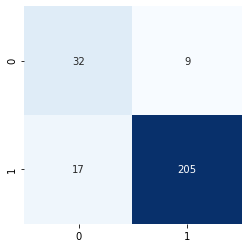

In [111]:
conf_mat = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)